In [85]:
# Import packages
import random as rd 
import numpy as np
import pprint 
pp = pprint.PrettyPrinter()

In [86]:
# Define init variables
n: int = 500
cities: list[str] = ['Eindhoven', 'Maastricht', 'Amsterdam', 'Roermond', 'Memphes', 'Dublin', 'Berlin', 'Paris', 'Barcalona', 'Nice', \
                     'London']
coordinates: list[list[int, int]] = [
    [0, 0],
    [-10, 15],
    [10, -7],
    [-4, -10],
    [19, 11],
    [30, -9],
    [40, 20],
    [-12, 62],
    [30, 80],
    [10, 70],
    [-23, -9]
]
number_of_iterations: int = 50

# Init the population
population = []
cities_shuffeld = cities
for i in range(n):
    rd.shuffle(cities_shuffeld)
    population.append(cities_shuffeld)

In [87]:
def Distance(origin: str, destination: str, coordinates: list, cities: list) -> float:
    coordinate_o = coordinates[cities.index(origin)]
    coordinate_d = coordinates[cities.index(destination)]

    if coordinate_d == coordinate_o:
        return 9999999
    else:
        return np.sqrt((coordinate_o[0]-coordinate_d[0])**2 +\
                        (coordinate_o[1]-coordinate_d[1])**2)

def Eval(population, cities, coordinates):
    total_distance = []
    for index in range(len(population)):
        total_distance.append(0)
        for city in range(len(cities)):
            try:
                total_distance[index] += Distance(origin=population[index][city], destination=population[index][(city + 1) % len(cities)],\
                                                coordinates=coordinates, cities=cities) + 1
            except:
                total_distance[index] += 1
    return [1 / distance for distance in total_distance]

In [88]:
def Mutation(population, n=len(cities), mutation_severity=10, threshold=50):
    for pop in range(len(population)):
        if rd.randint(0, 10) * mutation_severity >= threshold:
            range_cities = n - 1
            indexing = rd.randint(0 , len(population)-1)
            gene1, gene2 = rd.randint(0, range_cities), rd.randint(0, range_cities)
            try:
                population[indexing][gene1], population[indexing][gene2] = population[indexing][gene2], population[indexing][gene1]
            except:
                pass
    return population

In [89]:
# def CrossOver(parent1, parent2, cities=cities):
#     start = rd.randint(0, len(cities) -1 )
#     end = rd.randint(0, len(cities) - 1) 
#     genome = parent1[start:end]
#     for city in genome:
#         parent2.pop(parent2.index(city))
#     # print(f'parent {parent2}')
#     # print(f'genome {genome}')
#     child = genome + parent2
#     # print(f'child {child}')
#     return child

In [90]:
def procreate(parent1, parent2):
    cities_len = len(parent1)
    cut_points = sorted([rd.randint(0, cities_len), rd.randint(0, cities_len)])

    cut_num1 = parent1[cut_points[0]:cut_points[1]]
    cut_num2 = parent2[cut_points[0]:cut_points[1]]

    cut_org1 = [city for city in cut_num1 if city not in cut_num2]
    cut_org2 = [city for city in cut_num2 if city not in cut_num1]

    child1 = crossover(parent2, cut_points, cut_org1)
    child2 = crossover(parent1, cut_points, cut_org2)

    print(f'child: {child1}, {child2}. Parent: {parent1}, {parent2}')
    return child1, child2

def crossover(parent, cut_points, cut_org):
    child = parent[:]
    k = 0
    for i in range(len(parent)):
        if i < cut_points[0] or i >= cut_points[1]:
            if parent[i] not in cut_org:
                child[i] = parent[i]
            else:
                child[i] = cut_org[k]
                k += 1
    return child

In [91]:
def NewGen(population, reward, cities):
    sorted_route = sorted(list(range(len(population))), key=lambda x: reward[x])
    sorted_genome = [population[i] for i in sorted_route]

    pi = np.array([reward[i] / sum(reward) for i in sorted_route])
    pi /= pi.sum()

    new_gen = []
    for i in range(len(population)-1):
        new_gen.append(population[np.random.choice(len(population), p=pi)])

    new_gen.append(procreate(sorted_genome[0], sorted_genome[1]))
    new_gen = Mutation(new_gen)
    print(new_gen)
    return new_gen

In [92]:
# Run simulation 
list_reward = []
for i in range(number_of_iterations):
    reward = Eval(population, cities, coordinates)
    population = NewGen(population, reward, cities)
#     pp.pprint(f'Current itteration: {i}, and Reward: {max(reward)},\n and Sequence: {population[np.argmax(reward)]}')
    list_reward.append(max(reward))
print(list_reward)

child: ['Roermond', 'Memphes', 'Berlin', 'Nice', 'Amsterdam', 'Dublin', 'Maastricht', 'London', 'Paris', 'Barcalona', 'Eindhoven'], ['Roermond', 'Memphes', 'Berlin', 'Nice', 'Amsterdam', 'Dublin', 'Maastricht', 'London', 'Paris', 'Barcalona', 'Eindhoven']. Parent: ['Roermond', 'Memphes', 'Berlin', 'Nice', 'Amsterdam', 'Dublin', 'Maastricht', 'London', 'Paris', 'Barcalona', 'Eindhoven'], ['Roermond', 'Memphes', 'Berlin', 'Nice', 'Amsterdam', 'Dublin', 'Maastricht', 'London', 'Paris', 'Barcalona', 'Eindhoven']
[['Dublin', 'Eindhoven', 'Nice', 'Memphes', 'Berlin', 'Maastricht', 'Paris', 'Amsterdam', 'London', 'Barcalona', 'Roermond'], ['Dublin', 'Eindhoven', 'Nice', 'Memphes', 'Berlin', 'Maastricht', 'Paris', 'Amsterdam', 'London', 'Barcalona', 'Roermond'], ['Dublin', 'Eindhoven', 'Nice', 'Memphes', 'Berlin', 'Maastricht', 'Paris', 'Amsterdam', 'London', 'Barcalona', 'Roermond'], ['Dublin', 'Eindhoven', 'Nice', 'Memphes', 'Berlin', 'Maastricht', 'Paris', 'Amsterdam', 'London', 'Barcalona'

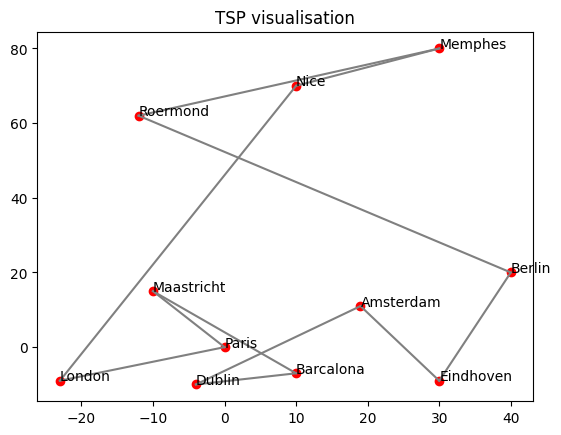

In [94]:
import matplotlib.pyplot as plt
def drawMap(city: list, coordinates: list, answer: list):
    # Create a dictionary mapping city names to their coordinates
    city_coordinates = dict(zip(city, coordinates))

    # Plot cities
    for j in city:
        coord = city_coordinates[j]
        plt.plot(coord[0], coord[1], "ro")
        plt.annotate(j, (coord[0], coord[1]))

    # Plot lines between cities based on the order in the answer
    for i in range(len(answer) - 1):
        first_city = answer[i]
        second_city = answer[i + 1]

        first_coord = city_coordinates[first_city]
        second_coord = city_coordinates[second_city]

        plt.plot([first_coord[0], second_coord[0]], [first_coord[1], second_coord[1]], "gray")

    # Plot line connecting the last city to the first city
    first_city = answer[0]
    last_city = answer[-1]

    first_coord = city_coordinates[first_city]
    last_coord = city_coordinates[last_city]

    plt.plot([first_coord[0], last_coord[0]], [first_coord[1], last_coord[1]], "gray")
    plt.title('TSP visualisation')
    plt.show()

drawMap(cities, coordinates, population[np.argmax(reward)])